# Joanie's EDA Explorations

## Questions to Explore

* Why are some zipcodes from the tract mapping dataset not in the broadband usage dataset?
* Are there patterns in what tracts are nulls?
* Are there patterns in how broadband and other covariates correlate with the rent burdened rate?
* Do all the census values we pulled make sense? (EDA of all census variables)

## Reading in the Data file and confirming zip code format

In [1]:
import pandas as pd
import numpy as np 
import altair as alt
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [4]:
## Helper function
def add_front_padding(x):
    zipcode = str(x)
    while len(zipcode) < 5:
        zipcode = "0"+zipcode
    return zipcode

In [5]:
data = pd.read_csv("../data/weighted_merged_all.csv", converters={'Zip' : lambda x: add_front_padding(x)})
data

,Zip,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,...,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_pop2,STATE,ZIP_TYPE,RUCA1,RUCA2
0,29639,3.0,0.0,8.0,3.0,3.0,5.0,3.0,163.0,93.12,...,15.151199,17.506064,88.950971,86.189438,100.000000,4306.115164,SC,Zip Code Area,6.0,6.0
1,29620,6.0,0.0,11.0,5.0,3.0,7.0,3.0,2536.0,212.50,...,14.892564,19.287297,93.098385,81.591357,100.000000,5274.299089,SC,Zip Code Area,4.0,4.0
2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.478883,14.745884,100.000000,83.900000,100.000000,3464.000000,SC,Zip Code Area,2.0,2.0
3,29638,6.0,1.0,13.0,4.0,4.0,6.0,4.0,272.0,82.79,...,10.668091,18.680260,93.406966,84.480742,100.000000,3849.135001,SC,Zip Code Area,6.0,6.0
4,29628,4.0,0.0,8.0,3.0,2.0,5.0,2.0,100.0,51.12,...,10.390630,21.713915,97.927401,78.157411,100.000000,2748.179543,SC,Zip Code Area,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32648,78839,3.0,3.0,11.0,1.0,1.0,4.0,1.0,1392.0,48.94,...,19.070245,27.109253,95.447426,75.592370,99.127211,5622.838142,TX,Zip Code Area,7.0,7.0
32649,78872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.963747,25.174920,99.962206,59.619735,99.946457,1614.839963,TX,Zip Code Area,5.0,5.0
32650,57622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.742706,34.482759,88.700000,59.700000,97.300000,2791.000000,SD,Zip Code Area,10.0,10.0
32651,57748,4.0,1.0,9.0,2.0,2.0,5.0,2.0,NaN,NaN,...,9.425449,27.852784,91.466664,67.164772,98.004716,3285.606370,SD,Zip Code Area,7.0,7.1


In [2]:
data = pd.read_csv("../data/fcc_census.csv")
data

,Unnamed: 0,tract_geoid,All_Provider_Count,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,...,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer
0,0,1001020100,7.0,3.0,4.0,0.0,5.0,4.0,0.0,3.0,...,7.616361,0.423131,0.000000,1.692525,24.259520,81.523272,0.000000,74.047955,7.475317,18.476728
1,1,1001020200,10.0,6.0,4.0,0.0,4.0,3.0,0.0,2.0,...,5.087209,0.000000,0.000000,2.761628,30.377907,74.709302,0.000000,66.860465,7.848837,25.290698
2,2,1001020300,10.0,6.0,4.0,0.0,4.0,3.0,0.0,2.0,...,3.897059,1.102941,0.000000,1.323529,18.308824,87.941176,0.000000,78.529412,9.411765,12.058824
3,3,1001020400,8.0,4.0,4.0,0.0,5.0,3.0,0.0,3.0,...,5.671642,0.000000,0.000000,0.179104,13.791045,92.597015,0.417910,85.313433,6.865672,7.402985
4,4,1001020500,13.0,9.0,4.0,0.0,5.0,4.0,0.0,3.0,...,3.792104,0.000000,0.000000,5.532010,5.442784,94.713362,0.000000,89.025206,5.688155,5.286638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73077,73077,36053030200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.767102,0.000000,0.768640,6.225980,16.756341,80.860876,0.000000,75.019216,5.841660,19.139124
73078,73078,46102940500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.344364,0.000000,0.000000,2.688728,43.536711,64.736298,0.930714,51.809721,11.995863,35.263702
73079,73079,46102940800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,6.189320,56.189320,51.213592,0.000000,35.436893,15.776699,48.786408
73080,73080,46102940900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.904051,4.690832,0.000000,3.304904,51.279318,58.955224,0.000000,42.217484,16.737740,41.044776


In [5]:
data.columns

Index(['Zip', 'WiredCount_2020', 'Fwcount_2020', 'AllProviderCount_2020',
       'Wired25_3_2020', 'Wired100_3_2020', 'All25_3_2020', 'All100_3',
       'TestCount', 'AverageMbps', 'FastestAverageMbps',
       '%Access to Terrestrial Broadband',
       'Lowest Priced Terrestrial Broadband Plan', 'WiredCount_2015',
       'Fwcount_2015', 'AllProviderCount_2015', 'Wired25_3_2015',
       'Wired100_3_2015', 'All25_3_2015', 'All100_3.1',
       'Total_Enrolled_Households', 'ST', 'COUNTY NAME', 'BROADBAND USAGE',
       'ERROR RANGE (MAE)(+/-)', 'ERROR RANGE (95%)(+/-)', 'MSD',
       'median_age_overall', 'median_age_male', 'median_age_female',
       'employment_rate', 'median_income', 'total_households',
       'ave_household_size', 'ave_family_size', 'total_population',
       'median_house_value', 'pct_white', 'pct_hisp_latino', 'pct_black',
       'pct_native', 'pct_asian', 'pct_hi_pi', 'pct_other_race',
       'pct_two+_race', 'pct_rent_burdened', 'poverty_rate',
       'pct_pop_bach

In [7]:
other_cols = [ 'pct_rent_burdened', 'poverty_rate',
       'pct_pop_bachelors+', 'pct_pop_hs+', 'pct_internet',
       'pct_internet_dial_up', 'pct_internet_broadband_any_type',
       'pct_internet_cellular', 'pct_only_cellular',
       'pct_internet_broadband_fiber', 'pct_internet_broadband_satellite',
       'pct_internet_only_satellite', 'pct_internet_other',
       'pct_internet_no_subscrp', 'pct_internet_none']

## Looking at Nulls by State

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data.isnull().sum()

Zip                                            0
WiredCount_2020                             3245
Fwcount_2020                                3245
AllProviderCount_2020                       3245
Wired25_3_2020                              3245
Wired100_3_2020                             3245
All25_3_2020                                3245
All100_3                                    3245
TestCount                                   6538
AverageMbps                                 6538
FastestAverageMbps                          6538
%Access to Terrestrial Broadband            3248
Lowest Priced Terrestrial Broadband Plan    6282
WiredCount_2015                             3247
Fwcount_2015                                3247
AllProviderCount_2015                       3247
Wired25_3_2015                              3247
Wired100_3_2015                             3247
All25_3_2015                                3247
All100_3.1                                  3247
Total_Enrolled_House

In [7]:
## Are the total pops the same? Yes, they only differ when NA
data[data.total_pop2!=data.total_population][["Zip","total_population", "total_pop2", "ZIP_TYPE", "ST", "COUNTY NAME", "BROADBAND USAGE"]]

,Zip,total_population,total_pop2,ZIP_TYPE,ST,COUNTY NAME,BROADBAND USAGE
903,22214,NaN,NaN,Post Office or large volume customer,VA,Arlington,1.0
1727,76508,NaN,NaN,Post Office or large volume customer,TX,Bell,0.0
4057,89702,NaN,NaN,Post Office or large volume customer,NV,Carson City,1.0
5575,73019,NaN,NaN,Zip Code Area,OK,Cleveland,1.0
7101,53792,NaN,NaN,Post Office or large volume customer,WI,Dane,0.0
13764,80419,NaN,NaN,Zip Code Area,CO,Jefferson,1.0
14815,98174,NaN,NaN,Post Office or large volume customer,WA,King,0.0
14828,98195,NaN,NaN,Zip Code Area,WA,King,1.0
20978,10110,NaN,NaN,Post Office or large volume customer,NY,New York,1.0
25558,84144,NaN,NaN,NaN,UT,Salt Lake,0.0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
WiredCount_2020,29408.0,4.046280,2.092368,0.00000,3.000000,4.000000,5.000000,2.400000e+01
Fwcount_2020,29408.0,1.795022,1.809475,0.00000,0.000000,1.000000,3.000000,1.400000e+01
AllProviderCount_2020,29408.0,11.205250,3.321932,1.00000,9.000000,11.000000,13.000000,3.600000e+01
Wired25_3_2020,29408.0,2.916689,2.036260,0.00000,1.000000,2.000000,4.000000,1.600000e+01
Wired100_3_2020,29408.0,2.499592,1.950574,0.00000,1.000000,2.000000,3.000000,1.300000e+01
All25_3_2020,29408.0,5.524585,2.339530,0.00000,4.000000,5.000000,7.000000,1.900000e+01
All100_3,29408.0,3.115683,2.182125,0.00000,2.000000,3.000000,4.000000,1.500000e+01
TestCount,26115.0,11658.469041,291403.759735,0.00000,135.000000,1177.000000,9275.500000,4.690484e+07
AverageMbps,26115.0,54.393155,50.179648,0.00000,14.195000,44.100000,82.680000,2.289330e+03
FastestAverageMbps,26115.0,134.793806,128.602807,0.00000,30.785000,103.130000,217.320000,6.802470e+03


## EDA of My Variables and Missing variables

In [9]:
data[other_cols].describe()

,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none
count,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000
mean,42.752335,13.614560,25.166213,59.986890,78.240019,0.597286,77.642733,59.675050,11.785082,14.695740,9.182034,2.066432,0.217271,3.246938,18.380699
std,13.687139,8.392302,14.790334,12.809202,10.559397,0.751254,10.651325,12.219352,6.120149,6.040588,6.061143,2.425983,0.456864,2.670227,9.642037
min,0.000000,0.000000,0.000000,6.532010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.833573,7.772876,15.197725,51.182781,72.525140,0.113740,71.794915,52.260060,7.313644,10.840077,4.761313,0.468019,0.000000,1.780166,11.472100
50%,42.900000,11.770126,20.706562,59.115094,79.189778,0.399908,78.450272,60.184040,10.730267,13.982269,7.746728,1.304844,0.033957,2.718908,17.568293
75%,51.500000,17.394346,30.546546,67.899892,85.587748,0.848650,85.082580,67.989863,15.098822,17.675972,12.186131,2.871622,0.252095,4.000915,23.691564
max,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.000000,100.000000,70.840688,78.938766,78.260738,11.428571,100.000000,100.000000


In [14]:
null_data = data[data.WiredCount_2020.isna()]
null_data.isnull().sum()

Zip                                            0
WiredCount_2020                             3245
Fwcount_2020                                3245
AllProviderCount_2020                       3245
Wired25_3_2020                              3245
Wired100_3_2020                             3245
All25_3_2020                                3245
All100_3                                    3245
TestCount                                   3245
AverageMbps                                 3245
FastestAverageMbps                          3245
%Access to Terrestrial Broadband            3245
Lowest Priced Terrestrial Broadband Plan    3245
WiredCount_2015                             3245
Fwcount_2015                                3245
AllProviderCount_2015                       3245
Wired25_3_2015                              3245
Wired100_3_2015                             3245
All25_3_2015                                3245
All100_3.1                                  3245
Total_Enrolled_House

In [15]:
null_data.describe()

,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD,median_age_overall,median_age_male,median_age_female,employment_rate,median_income,total_households,ave_household_size,ave_family_size,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_pop2,RUCA1,RUCA2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3245.000000,3245.000000,3245.000000,3245.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3.244000e+03,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3237.000000,3237.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.226197,0.101221,0.398674,0.020102,43.672413,42.765962,44.597290,53.124687,57440.203912,1526.221866,2.552192,3.071019,4078.395802,1.833280e+05,78.285908,9.354168,5.418417,3.611104,1.104118,0.213054,0.104429,1.896299,41.602899,14.340781,21.826021,56.989875,75.574904,0.651973,74.922931,55.759824,12.252806,15.178797,10.221261,2.640383,0.270943,3.276676,20.966712,84.996951,0.626529,74.220983,10.149439,14.821341,93.787650,87.046374,99.003429,4078.395802,5.029348,5.037164
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.307878,0.058406,0.267244,0.013857,7.492726,7.820000,7.769624,10.949278,21265.537796,719.942918,0.405326,0.458046,2013.323019,1.666217e+05,24.776220,16.697801,12.572610,14.938472,3.299575,2.180963,0.382572,2.786868,16.624370,9.511597,12.772931,12.791224,12.575864,0.866731,12.619033,13.454783,6.955259,7.430670,6.886887,3.086894,0.613066,2.944719,11.811236,9.694470,0.849884,12.773787,5.891688,9.088468,8.614471,9.452175,6.339542,2013.323019,3.412341,3.418848
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.002000,0.005000,-0.001000,18.800000,5.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.445026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.050000,0.170000,0.007000,39.400000,38.000000,40.200000,47.195556,44528.250000,1048.000000,2.310000,2.810000,2697.831065,9.590000e+04,70.300000,1.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.500000,31.000000,7.768774,13.502679,47.972943,70.673308,0.000000,69.977987,49.007687,7.215653,10.161841,5.074022,0.665955,0.000000,1.574089,13.405172,81.492602,0.000000,68.934599,6.210711,9.131376,92.000000,82.700000,99.700000,2697.831065,2.000000,2.000000
50%,NaN,NaN,Na

In [27]:
other_cols[i]

'pct_rent_burdened'

In [40]:
# set normal plot size
plt.rcParams["figure.figsize"] = (15,20)

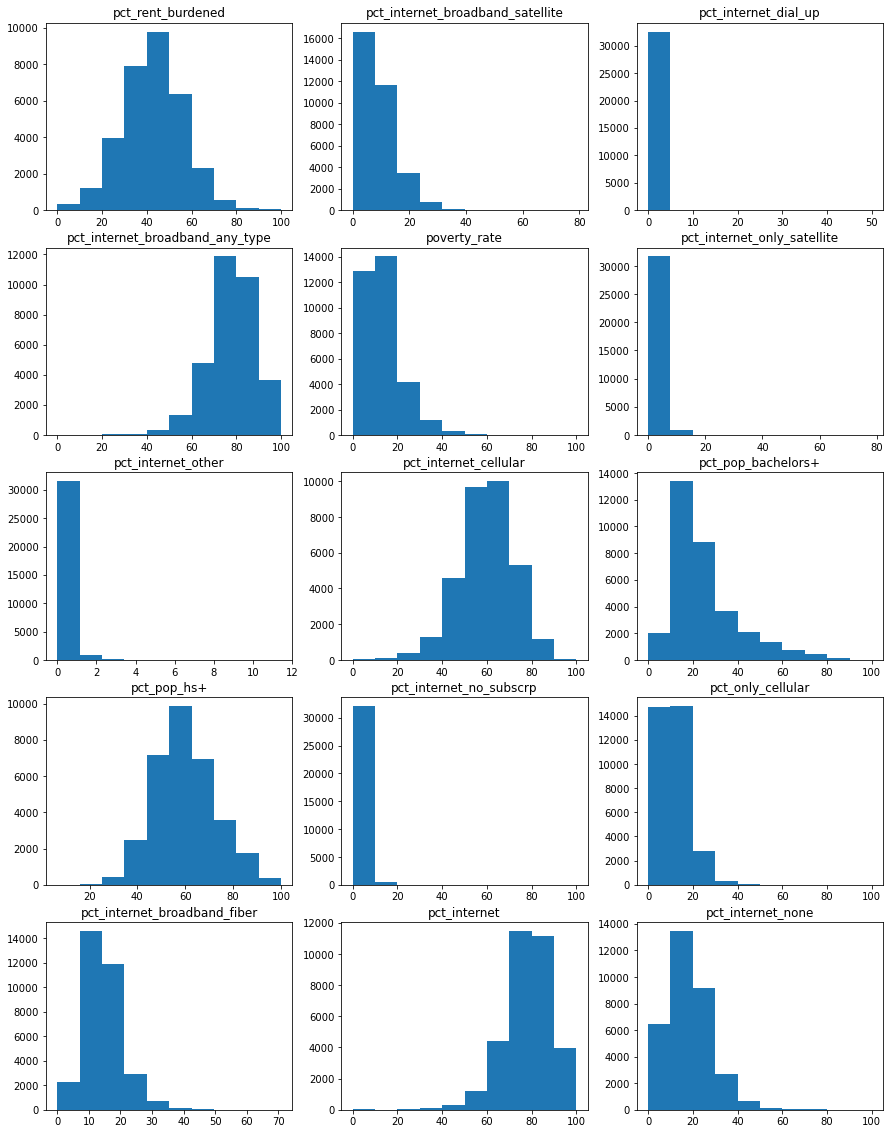

In [42]:
fig, axs = plt.subplots(5, 3)
for i in range(len(other_cols)):
    axs[i%5,i%3].hist(data[other_cols[i]])
    axs[i%5,i%3].set_title(other_cols[i])

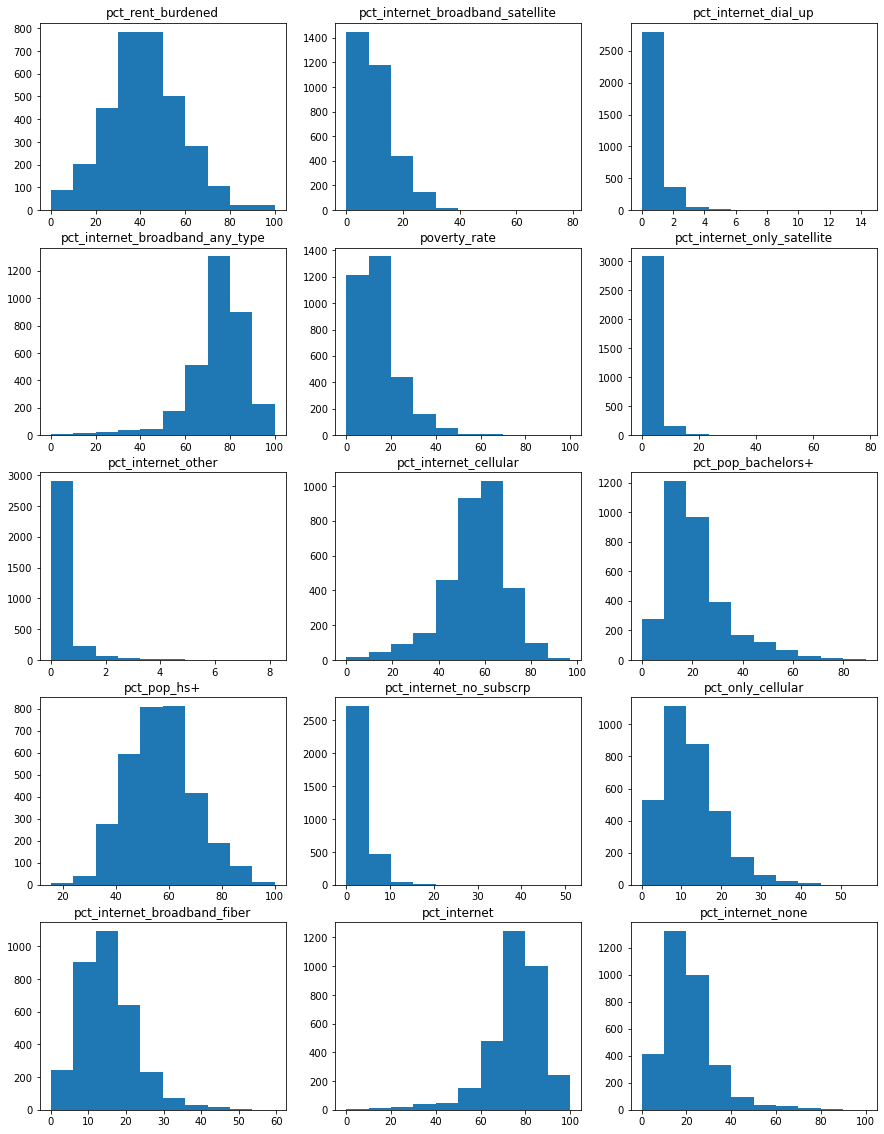

In [43]:
fig, axs = plt.subplots(5, 3)
for i in range(len(other_cols)):
    axs[i%5,i%3].hist(null_data[other_cols[i]])
    axs[i%5,i%3].set_title(other_cols[i])

In [48]:
data.corr()['pct_rent_burdened']

WiredCount_2020                             0.104935
Fwcount_2020                               -0.152211
AllProviderCount_2020                      -0.002634
Wired25_3_2020                              0.128517
Wired100_3_2020                             0.155882
All25_3_2020                                0.090039
All100_3                                    0.145075
TestCount                                   0.006273
AverageMbps                                 0.172716
FastestAverageMbps                          0.176443
Lowest Priced Terrestrial Broadband Plan   -0.148001
WiredCount_2015                             0.002591
Fwcount_2015                               -0.188816
AllProviderCount_2015                      -0.092464
Wired25_3_2015                              0.129339
Wired100_3_2015                             0.134402
All25_3_2015                                0.123310
All100_3.1                                  0.131433
Total_Enrolled_Households                   0.

## Investigating the EBB Data

The EBB site says that they won't release EBB data for privacy reasons for the following types of places:
USAC has redacted any ZIP codes meeting the criteria developed by the FCC to protect subscriber privacy and to reduce the risk of identification of enrolled households.  ZIP codes are excluded if:
* their estimated population is below 50
* if a population estimate for the ZIP code is not available in the American Community Survey
* if there are fewer than 1,000 enrolled households in a ZIP code and those households comprise most of a ZIP code’s estimated population
* or if the number of EBB enrolled households in a ZIP code equals or exceeds the population estimate range for that ZIP code.



In [9]:
data[data.Total_Enrolled_Households.isna()].ST.value_counts()

PA    404
TX    280
CA    240
NY    207
OH    186
ND    157
MT    154
IL    151
NE    149
WV    141
SD    133
NM    120
CO    116
MO    113
WY    104
AZ    103
IA    103
MN    101
KS     98
UT     96
AK     94
IN     92
OK     90
AR     86
WA     84
NC     79
VA     79
MI     77
ID     71
ME     71
WI     62
KY     61
FL     59
AL     58
MD     56
MA     54
OR     53
NJ     53
GA     52
LA     50
SC     48
NV     47
MS     45
TN     32
HI     31
NH     28
VT     24
CT     17
DE     10
RI      8
DC      6
Name: ST, dtype: int64

In [10]:
# Let's look at data with small populations
data[data.total_population < 50][["Zip","total_population",  "ZIP_TYPE", "ST", "Total_Enrolled_Households", "COUNTY NAME", "BROADBAND USAGE"]]

,Zip,total_population,ZIP_TYPE,ST,Total_Enrolled_Households,COUNTY NAME,BROADBAND USAGE
24052,99923,14.0,Zip Code Area,AK,NaN,Prince of Wales-Hyder Census Area,1.0


In [11]:
# Let's look at data with small populations that might not be reporting Total_Enrolled_Households
print(data[data.total_households < 1000].shape)
print(data[(data.total_households < 1000) & (data.Total_Enrolled_Households.isna())].shape)
data[(data.total_households < 1000) & (data.Total_Enrolled_Households.isna())][["Zip","total_population", "ZIP_TYPE", "ST", "Total_Enrolled_Households", "COUNTY NAME", "BROADBAND USAGE", "AllProviderCount_2020"]]

(4514, 73)
(1429, 73)


,Zip,total_population,ZIP_TYPE,ST,Total_Enrolled_Households,COUNTY NAME,BROADBAND USAGE,AllProviderCount_2020
99,50839,1651.000000,Zip Code Area,IA,NaN,Adams,0.000,6.0
101,50857,1950.345542,Zip Code Area,IA,NaN,Adams,0.153,10.0
159,99105,1630.000000,Zip Code Area,WA,NaN,Adams,0.563,9.0
279,94613,2728.000000,Zip Code Area,CA,NaN,Alameda,1.000,NaN
320,12222,4867.907986,Post Office or large volume customer,NY,NaN,Albany,1.000,8.0
...,...,...,...,...,...,...,...,...
32626,99781,1158.000000,Zip Code Area,AK,NaN,Yukon-Koyukuk Census Area,0.133,2.0
32630,85336,2531.506164,Zip Code Area,AZ,NaN,Yuma,1.000,NaN
32632,85352,1608.000000,Zip Code Area,AZ,NaN,Yuma,0.080,NaN
32649,78872,1614.839963,Zip Code Area,TX,NaN,Zavala,0.071,NaN


In [12]:
## There is no indicator for 0 providers... Can we assume 0?
data[data.AllProviderCount_2020 < 1]

,Zip,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD,median_age_overall,median_age_male,median_age_female,employment_rate,median_income,total_households,ave_household_size,ave_family_size,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_pop2,STATE,ZIP_TYPE,RUCA1,RUCA2


## Investigating the ZIP TYPE

Some of our zip codes might be large companies or PO boxes that don't make sense to include.

In [13]:
data[data.ZIP_TYPE=="Post Office or large volume customer"]["BROADBAND USAGE"].value_counts()

0.000    832
1.000    197
0.044     10
0.127      9
0.005      9
        ... 
0.623      1
0.823      1
0.660      1
0.673      1
0.245      1
Name: BROADBAND USAGE, Length: 518, dtype: int64

(array([1283.,  266.,  177.,  107.,   54.,   49.,   46.,   26.,   16.,
         217.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

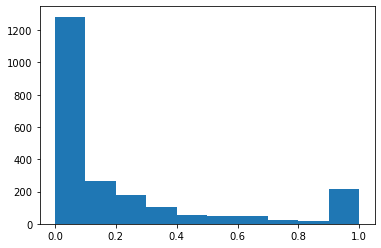

In [14]:
fig, axs = plt.subplots(1, 1)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(data[data.ZIP_TYPE=="Post Office or large volume customer"]["BROADBAND USAGE"])

In [15]:
# Suggestions
# Let's drop zips that are not Zip Code Areas
# Let's drop if total_population NA
temp = data[data.ZIP_TYPE=="Zip Code Area"]
temp = temp[~temp.total_population.isna()]
temp

,Zip,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD,median_age_overall,median_age_male,median_age_female,employment_rate,median_income,total_households,ave_household_size,ave_family_size,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_pop2,STATE,ZIP_TYPE,RUCA1,RUCA2
0,29639,3.0,0.0,8.0,3.0,3.0,5.0,3.0,163.0,93.12,223.75,90%,40.00,3.0,0.0,5.0,3.0,3.0,3.0,3.0,21.0,SC,Abbeville,0.948,0.034,0.110,0.002,37.550512,33.269798,43.424797,51.574744,52572.891752,1330.307664,2.768668,3.357934,4306.115164,95985.764786,76.589544,2.788520,16.042600,0.000000,1.791734,0.0,0.000000,2.687602,43.985411,17.905249,19.582827,60.842972,68.689906,0.074843,68.615063,48.885741,14.920652,17.174151,5.031883,2.170438,0.375200,5.747541,25.562553,82.493936,0.074843,67.267894,15.151199,17.506064,88.950971,86.189438,100.000000,4306.115164,SC,Zip Code Area,6.0,6.0
1,29620,6.0,0.0,11.0,5.0,3.0,7.0,3.0,2536.0,212.50,536.35,98%,40.00,6.0,0.0,8.0,3.0,3.0,3.0,3.0,542.0,SC,Abbeville,0.398,0.002,0.007,0.000,44.969110,43.936586,45.418218,52.052838,36943.842035,2164.599987,2.402883,3.061932,5274.299089,97735.103000,61.242744,1.427307,36.189646,0.130169,0.013777,0.0,0.000000,0.985261,52.288194,19.620790,15.633804,53.774718,67.955913,0.000575,67.955338,57.786308,10.093722,8.476881,4.558935,0.418545,0.454245,4.705993,27.338094,80.712703,0.000575,65.819564,14.892564,19.287297,93.098385,81.591357,100.000000,5274.299089,SC,Zip Code Area,4.0,4.0
2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,Abbeville,0.206,0.152,0.608,0.043,48.500000,48.400000,48.800000,46.100000,36942.000000,1397.000000,2.480000,2.910000,3464.000000,92900.000000,96.000000,0.300000,3.600000,0.000000,0.000000,0.0,0.000000,0.000000,62.500000,16.863991,19.540230,54.727475,61.775233,0.000000,61.775233,51.825340,5.869721,7.659270,3.793844,0.000000,0.214746,12.956335,25.268432,85.254116,0.000000,61.775233,23.478883,14.745884,100.000000,83.900000,100.000000,3464.000000,SC,Zip Code Area,2.0,2.0
3,29638,6.0,1.0,13.0,4.0,4.0,6.0,4.0,272.0,82.79,222.35,95%,40.00,5.0,0.0,7.0,2.0,2.0,2.0,2.0,68.0,SC,Abbeville,0.369,0.010,0.031,-0.001,41.227244,39.474290,43.531624,50.489605,46262.734368,1376.287278,2.576335,3.155941,3849.135001,90655.570400,78.012401,2.777750,16.005229,0.000000,0.928906,0.0,0.000000,2.233967,45.636079,15.537107,15.963346,56.127742,71.838817,0.404128,71.434689,52.501313,16.697691,17.097642,4.840706,1.041495,0.156939,3.776371,24.384813,81.319740,0.404128,70.247521,10.668091,18.680260,93.406966,84.480742,100.000000,3849.135001,SC,Zip Code Area,6.0,6.0
4,29628,4.0,0.0,8.0,3.0,2.0,5.0,2.0,100.0,51.12,126.06,95%,40.00,4.0,0.0,6.0,3.0,3.0,3.0,3.0,102.0,SC,Abbeville,0.221,0.014,0.043,0.000,42.128810,36.462735,47.271399,43.352088,27462.649657,1113.068894,2.464650,3.416300,2748.179543,63066.909567,52.588831,0.498695,42.456837,0.013048,0.000000,0.0,0.000000,4.441284,51.716284,25.600064,8.811430,43.270335,70.473209,0.000000,70.473209,50.569821,17.360446,18.984496,3.245942,0.010795,0.442579,4.202075,25.324715,78.286085,0.000000,67

In [16]:
temp.isnull().sum()

Zip                                            0
WiredCount_2020                             1174
Fwcount_2020                                1174
AllProviderCount_2020                       1174
Wired25_3_2020                              1174
Wired100_3_2020                             1174
All25_3_2020                                1174
All100_3                                    1174
TestCount                                   4390
AverageMbps                                 4390
FastestAverageMbps                          4390
%Access to Terrestrial Broadband            1174
Lowest Priced Terrestrial Broadband Plan    4145
WiredCount_2015                             1176
Fwcount_2015                                1176
AllProviderCount_2015                       1176
Wired25_3_2015                              1176
Wired100_3_2015                             1176
All25_3_2015                                1176
All100_3.1                                  1176
Total_Enrolled_House

In [17]:
# Let's fill broadband data counts for these rows with 0
temp.loc[(temp["BROADBAND USAGE"] == 0) & (temp["WiredCount_2020"].isna()), "WiredCount_2020"] = 0

In [18]:
temp.isnull().sum()

Zip                                            0
WiredCount_2020                              937
Fwcount_2020                                1174
AllProviderCount_2020                       1174
Wired25_3_2020                              1174
Wired100_3_2020                             1174
All25_3_2020                                1174
All100_3                                    1174
TestCount                                   4390
AverageMbps                                 4390
FastestAverageMbps                          4390
%Access to Terrestrial Broadband            1174
Lowest Priced Terrestrial Broadband Plan    4145
WiredCount_2015                             1176
Fwcount_2015                                1176
AllProviderCount_2015                       1176
Wired25_3_2015                              1176
Wired100_3_2015                             1176
All25_3_2015                                1176
All100_3.1                                  1176
Total_Enrolled_House

## New data file

In [2]:
df = pd.read_csv("../data/fcc_census_2.csv")
df

,tract_geoid,All_Provider_Count,All_Providers,MaxAdDown,MaxAdUp,AllMaxAdDown,AllMaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,...,pct_pop_60_to_64,pct_pop_65_to_69,pct_pop_70_to_74,pct_pop_75_to_79,pct_pop_80_to_84,pct_pop_gt_85,pct_pop_disability,pct_pop_households_with_kids,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps)
0,1001020100,7,"{56004, 58757, 54694, 67056, 59349, 55262, 58623}",1000.0,50.0,"{0.0, 0.768, 1.5, 3.0, 100.0, 2.0, 6.0, 1000.0...","{0.0, 0.512, 0.128, 35.0, 3.0, 0.384, 0.768, 0...",3.0,4,0.0,...,4.114400,5.017561,3.863522,0.903161,1.655795,1.806322,20.572002,4.809591,77.500000,11.237
1,1001020200,10,"{56004, 58757, 54694, 67056, 59349, 56888, 555...",1000.0,50.0,"{0.0, 1.5, 2.0, 3.0, 100.0, 6.0, 1000.0, 10.0,...","{0.0, 0.384, 0.512, 35.0, 3.0, 0.128, 0.768, 0...",6.0,4,0.0,...,5.819296,3.930577,3.420112,3.266973,1.123022,2.756508,12.413793,4.040698,93.456001,11.279
2,1001020300,10,"{56004, 58757, 54694, 67056, 59349, 56888, 555...",1000.0,50.0,"{0.0, 2.0, 100.0, 6.0, 1000.0, 940.0, 12.0, 18...","{0.0, 0.512, 0.768, 35.0, 3.0, 1.3, 50.0}",6.0,4,0.0,...,4.163102,2.680354,5.389222,5.132592,1.397206,1.425720,18.646488,2.794118,81.476997,11.273
3,1001020400,8,"{56004, 58757, 54694, 67056, 59349, 55514, 552...",1000.0,50.0,"{0.0, 0.768, 1.5, 3.0, 100.0, 5.0, 6.0, 2.0, 1...","{0.0, 0.512, 0.128, 35.0, 3.0, 0.384, 0.768, 0...",4.0,4,0.0,...,9.257349,7.400722,5.208871,5.698814,4.125838,2.037133,18.268734,1.462687,98.705002,11.049
4,1001020500,13,"{56004, 58757, 54694, 56170, 54860, 54927, 670...",1000.0,1000.0,"{0.0, 1.5, 2.0, 100.0, 6.0, 1000.0, 75.0, 940....","{0.0, 0.512, 0.128, 35.0, 3.0, 0.768, 5.0, 1.3...",9.0,4,0.0,...,2.538694,3.359758,4.039260,1.642129,1.755379,3.010570,16.625555,0.780727,100.480003,11.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73051,56043000200,10,"{56004, 56358, 54694, 57421, 59469, 56273, 593...",1000.0,1000.0,"{0.0, 2.0, 35.0, 5.0, 1000.0, 40.0, 10.0, 940....","{0.0, 1.0, 2.0, 3.0, 35.0, 1.3, 6.0, 1000.0, 1...",5.0,4,4.0,...,8.882334,7.374631,5.506391,3.572599,2.687643,1.081613,15.320148,1.831761,17.705999,6.305
73052,56043000301,11,"{56004, 56358, 54694, 56683, 57421, 59469, 562...",1000.0,1000.0,"{0.0, 2.0, 35.0, 1000.0, 10.0, 940.0, 15.0, 50...","{0.0, 1.0, 1.3, 3.0, 35.0, 1000.0, 10.0, 20.0}",4.0,4,3.0,...,2.820306,5.680902,5.680902,3.867849,2.900886,4.230459,11.985324,2.389381,42.113998,11.350
73053,56043000302,10,"{56004, 56358, 54694, 57421, 59469, 56273, 593...",1000.0,1000.0,"{0.0, 2.0, 35.0, 1000.0, 10.0, 940.0, 15.0, 25...","{0.0, 1.0, 1.3, 3.0, 35.0, 1000.0, 10.0}",3.0,4,3.0,...,8.420209,6.535686,5.773857,4.490778,2.165196,1.924619,14.954807,2.866044,46.433998,11.177
73054,56045951100,11,"{56004, 54694, 55912, 56683, 57421, 59469, 593...",1000.0,1000.0,"{0.0, 2.0, 35.0, 100.0, 1000.0, 10.0, 12.0, 94...","{0.0, 1.0, 1.3, 3.0, 100.0, 5.0, 35.0, 1000.0,...",5.0,4,3.0,...,11.930783,6.769885,5.160899,2.732240,2.975106,2.155434,16.000000,1.761696,20.120001,3.744


In [3]:
df = df[df.total_population>0]

In [7]:
df = df.drop(columns = ["AllMaxAdUp", "AllMaxAdDown"])

In [8]:
df.to_csv("../data/fcc_census_2.csv", index_label=False)